# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import plot_tree


import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv(r"C:\Users\Nishi\Downloads\Automobile_Loan_Dataset\Train_Dataset.csv", 
                    low_memory=False)

In [3]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655054,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631354537,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355638717,0.2021,674.0,1.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [5]:
df.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [6]:
#print the na count
nan_counts = df.isna().sum()
print(nan_counts)

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [7]:
df.shape

(121856, 40)

# Data Preprocessing and EDA

In [8]:
#check all the distinguished features of the dataset
df.select_dtypes(include='object').nunique()

Client_Income                  1217
Credit_Amount                  4176
Loan_Annuity                  10858
Accompany_Client                  7
Client_Income_Type                8
Client_Education                  5
Client_Marital_Status             4
Client_Gender                     3
Loan_Contract_Type                2
Client_Housing_Type               6
Population_Region_Relative       83
Age_Days                      17001
Employed_Days                  9950
Registration_Days             14143
ID_Days                        5963
Client_Occupation                18
Client_Permanent_Match_Tag        2
Client_Contact_Work_Tag           2
Type_Organization                58
Score_Source_3                  772
dtype: int64

In [9]:
#remove the ID column as we dont need it in the train dataset
df.drop(columns = ['ID', 'ID_Days'], inplace=True)

In [10]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
print(numerical_columns.columns)

Index(['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count',
       'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1',
       'Score_Source_2', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')


In [11]:
df.select_dtypes(include=['int64', 'float64']).nunique()

Car_Owned                       2
Bike_Owned                      2
Active_Loan                     2
House_Own                       2
Child_Count                    14
Own_House_Age                  55
Mobile_Tag                      2
Homephone_Tag                   2
Workphone_Working               2
Client_Family_Members          15
Cleint_City_Rating              3
Application_Process_Day         7
Application_Process_Hour       24
Score_Source_1              43968
Score_Source_2              67016
Social_Circle_Default        1882
Phone_Change                 3590
Credit_Bureau                  21
Default                         2
dtype: int64

In [12]:
object_columns = df.select_dtypes(include=['object'])
print(object_columns.columns)

Index(['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'Client_Occupation', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_3'],
      dtype='object')


In [13]:
# Change numerical column datatypes from object to int and remove string data

# Clean and convert 'Client_Income' column to numeric
df['Client_Income'] = df['Client_Income'].str.replace('[^0-9.]', '', regex=True)
df['Client_Income'] = pd.to_numeric(df['Client_Income'], errors='coerce')

# Clean and convert 'Credit_Amount' column to numeric
df['Credit_Amount'] = df['Credit_Amount'].str.replace('[^0-9.]', '', regex=True)
df['Credit_Amount'] = pd.to_numeric(df['Credit_Amount'], errors='coerce')

# Clean and convert 'Loan_Annuity' column to numeric
df['Loan_Annuity'] = df['Loan_Annuity'].str.replace('[^0-9.]', '', regex=True)
df['Loan_Annuity'] = pd.to_numeric(df['Loan_Annuity'], errors='coerce')

# Clean and convert 'Population_Region_Relative' column to numeric
df['Population_Region_Relative'] = df['Population_Region_Relative'].str.replace('[^0-9.]', '', regex=True)
df['Population_Region_Relative'] = pd.to_numeric(df['Population_Region_Relative'], errors='coerce')

# Clean and convert 'Age_Days' column to numeric
df['Age_Days'] = df['Age_Days'].str.replace('[^0-9.]', '', regex=True)
df['Age_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')

# Clean and convert 'Employed_Days' column to numeric
df['Employed_Days'] = df['Employed_Days'].str.replace('[^0-9.]', '', regex=True)
df['Employed_Days'] = pd.to_numeric(df['Employed_Days'], errors='coerce')

# Clean and convert 'Registration_Days' column to numeric
df['Registration_Days'] = df['Registration_Days'].str.replace('[^0-9.]', '', regex=True)
df['Registration_Days'] = pd.to_numeric(df['Registration_Days'], errors='coerce')

# Clean and convert 'Score_Source_3' column to numeric
df['Score_Source_3'] = df['Score_Source_3'].str.replace('[^0-9.]', '', regex=True)
df['Score_Source_3'] = pd.to_numeric(df['Score_Source_3'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118234 non-null  float64
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118219 non-null  float64
 7   Loan_Annuity                117030 non-null  float64
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

In [15]:
df.describe()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.182340e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,118219.000000,117030.000000,116988.000000,118239.000000,118190.000000,118225.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,94934.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.686519e+04,0.342854,0.332262,0.499175,0.692060,0.417779,60046.488951,2721.254492,0.022602,16027.422948,67154.070615,4975.162123,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.511180,0.117428,962.106056,1.891082,0.080792
std,1.153815e+04,0.474665,0.471026,0.500001,0.461644,0.728802,40350.663346,1461.466162,0.413617,4366.356504,138971.782951,3514.546963,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.194333,0.107974,827.976726,1.861921,0.272517
min,2.565000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4500.000000,217.350000,0.000533,7676.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000527,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,27000.000000,1657.350000,0.010006,12398.000000,932.000000,2008.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.372334,0.057700,272.000000,0.000000,0.000000
50%,1.440000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,51750.000000,2499.750000,0.018850,15734.000000,2212.000000,4493.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.537070,0.088700,755.000000,1.000000,0.000000
75%,2.025000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,80865.000000,3466.800000,0.028663,19661.000000,5634.000000,7464.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.667458,0.148500,1570.000000,3.000000,0.000000
max,1.800009e+06,1.000000,1.000000,1.000000,1.000000,19.000000,405000.000000,22500.000000,100.000000,25201.000000,365243.000000,23738.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,0.896010,1.000000,4185.000000,22.000000,1.000000


In [16]:
#checking the unique values and distribution in the client occupation column
unique_occupations = df['Client_Occupation'].unique()
print(unique_occupations)

['Sales' nan 'Realty agents' 'Laborers' 'Core' 'Drivers' 'Managers'
 'Accountants' 'High skill tech' 'Cleaning' 'HR' 'Waiters/barmen'
 'Low-skill Laborers' 'Medicine' 'Cooking' 'Private service' 'Security'
 'IT' 'Secretaries']


In [17]:
occupation_counts = df['Client_Occupation'].value_counts()
print(occupation_counts)

Client_Occupation
Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: count, dtype: int64


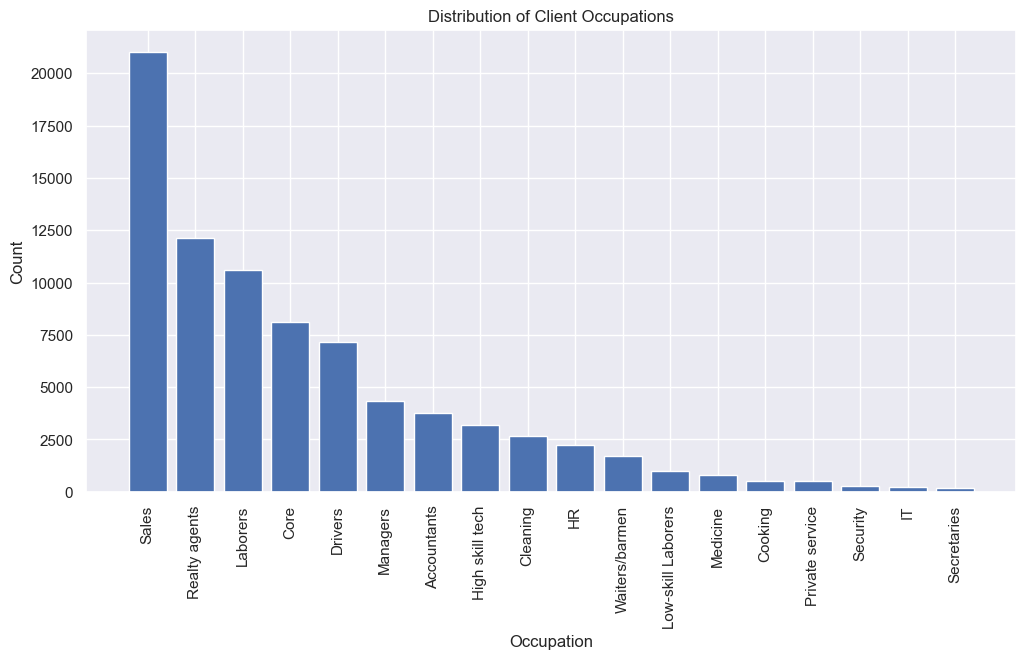

In [18]:
# Filter out missing values (NaN) in the 'Client_Occupation' column
filtered_df = df[df['Client_Occupation'].notna()]

# Data
unique_occupations = filtered_df['Client_Occupation'].unique()
occupation_counts = filtered_df['Client_Occupation'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(unique_occupations, occupation_counts)

# Set labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Client Occupations')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [19]:
# Define a function to map occupations to new categories
def map_occupation(category):
    if pd.isna(category):
        return 'Unknown'
    elif category in ['Sales', 'Realty agents', 'Managers', 'Accountants', 'High skill tech', 'IT']:
        return 'Professional'
    elif category in ['Laborers', 'Core', 'Drivers', 'Cleaning', 'Low-skill Laborers']:
        return 'Skilled Labor'
    elif category in ['HR', 'Waiters/barmen', 'Cooking', 'Private service', 'Security', 'Secretaries']:
        return 'Service'
    elif category == 'Medicine':
        return 'Healthcare'
    else:
        return 'Other'

# Apply the function to the 'Client_Occupation' column and create a new 'Occupation_Category' column
df['Client_Occupation'] = df['Client_Occupation'].apply(map_occupation)

<Axes: xlabel='Client_Occupation'>

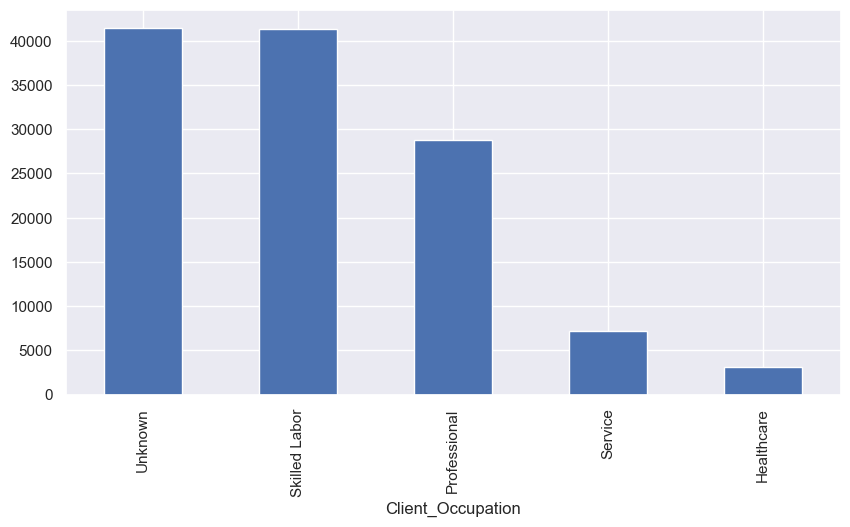

In [20]:
plt.figure(figsize=(10,5))
df['Client_Occupation'].value_counts().plot(kind='bar')

In [21]:
#checking the unique values and distribution in the client occupation column
unique_organizations = df['Type_Organization'].unique()
print(unique_organizations)

['Self-employed' 'Government' 'XNA' 'Business Entity Type 3' 'Other' nan
 'Industry: type 3' 'Business Entity Type 2' 'Business Entity Type 1'
 'Transport: type 4' 'Construction' 'Kindergarten' 'Trade: type 3'
 'Industry: type 2' 'Trade: type 7' 'Trade: type 2' 'Agriculture'
 'Military' 'Medicine' 'Housing' 'Industry: type 1' 'Industry: type 11'
 'Bank' 'School' 'Industry: type 9' 'Postal' 'University'
 'Transport: type 2' 'Restaurant' 'Electricity' 'Police'
 'Industry: type 4' 'Security Ministries' 'Services' 'Transport: type 3'
 'Mobile' 'Hotel' 'Security' 'Industry: type 7' 'Advertising' 'Cleaning'
 'Realtor' 'Trade: type 6' 'Culture' 'Industry: type 5' 'Telecom'
 'Trade: type 1' 'Industry: type 12' 'Industry: type 8' 'Insurance'
 'Emergency' 'Legal Services' 'Industry: type 10' 'Trade: type 4'
 'Industry: type 6' 'Transport: type 1' 'Industry: type 13' 'Religion'
 'Trade: type 5']


In [22]:
# Define a function to map organization types to new categories
def map_organization(category):
    if pd.isna(category):
        return 'Unknown'
    elif category == 'XNA':
        return 'Unknown'
    elif category in ['Self-employed', 'Government']:
        return 'Public Sector'
    elif category in ['Business Entity Type 3', 'Business Entity Type 2', 'Business Entity Type 1', 'Construction']:
        return 'Business'
    elif category in ['Trade: type 3', 'Trade: type 7', 'Trade: type 2', 'Agriculture']:
        return 'Trade'
    elif category in ['Military', 'Medicine', 'Housing', 'Industry: type 1', 'Industry: type 11', 'Bank', 'School', 'Industry: type 9', 'Postal', 'University']:
        return 'Institution'
    elif category in ['Transport: type 4', 'Transport: type 2', 'Transport: type 3', 'Transport: type 1']:
        return 'Transport'
    else:
        return 'Other'

# Apply the function to the 'Type_Organization' column
df['Type_Organization'] = df['Type_Organization'].apply(map_organization)

<Axes: xlabel='Type_Organization'>

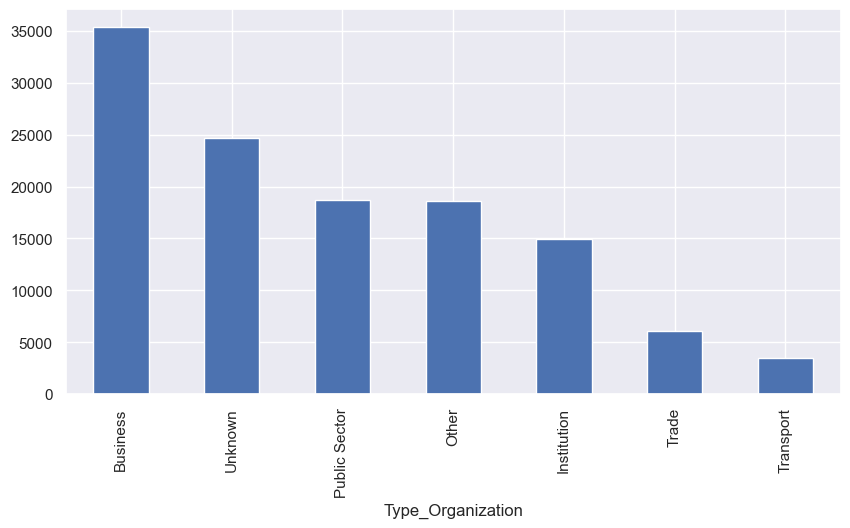

In [23]:
plt.figure(figsize=(10,5))
df['Type_Organization'].value_counts().plot(kind='bar')

In [24]:
#categorical columns
categorical_columns = ['Mobile_Tag', 'Homephone_Tag', 'Workphone_Working','Default','House_Own','Active_Loan','Bike_Owned','Car_Owned']

# Replace '1' with 'yes' and '0' with 'no' in each column
for col in categorical_columns:
    df[col] = df[col].replace({1: 'yes', 0: 'no'})

In [25]:
df.shape

(121856, 38)

In [26]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,6750.0,no,no,yes,no,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,NaN,yes,yes,no,Professional,2.0,2.0,6.0,17.0,Yes,Yes,Public Sector,0.568066,0.478787,NaN,0.0186,63.0,NaN,no
1,20250.0,yes,no,yes,NaN,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,0.0,yes,no,yes,Unknown,2.0,2.0,3.0,10.0,Yes,Yes,Public Sector,0.563360,0.215068,NaN,NaN,NaN,NaN,no
2,18000.0,no,no,yes,no,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,NaN,yes,no,no,Professional,2.0,2.0,4.0,NaN,Yes,Yes,Public Sector,NaN,0.552795,0.329655,0.0742,277.0,0.0,no
3,15750.0,no,no,yes,yes,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,NaN,yes,no,no,Unknown,2.0,3.0,2.0,15.0,Yes,Yes,Unknown,NaN,0.135182,0.631355,NaN,1700.0,3.0,no
4,33750.0,yes,no,yes,no,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,6.0,yes,no,no,Skilled Labor,4.0,1.0,3.0,NaN,Yes,Yes,Business,0.508199,0.301182,0.355639,0.2021,674.0,1.0,no


In [27]:
#checking the unique values and distribution in the mobile tag column
mobile_Tag = df['Mobile_Tag'].unique()
print(mobile_Tag)

mobile_Tag_counts = df['Mobile_Tag'].value_counts()
print(mobile_Tag_counts)

['yes' 'no']
Mobile_Tag
yes    121855
no          1
Name: count, dtype: int64


In [28]:
#drop the mobile tag column
df.drop(columns = 'Mobile_Tag', inplace=True)
df.shape

(121856, 37)

In [29]:
null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, 
                        keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", 
       missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                    column name  Total missing  Percent missing
0                Own_House_Age          80095         0.657292
1               Score_Source_1          68835         0.564888
2        Social_Circle_Default          61928         0.508206
3               Score_Source_3          26922         0.220933
4                Credit_Bureau          18540         0.152147
5               Score_Source_2           5686         0.046662
6   Population_Region_Relative           4868         0.039949
7                 Loan_Annuity           4826         0.039604
8           Client_Income_Type           3701         0.030372
9          Client_Housing_Type           3687         0.030257
10               Employed_Days           3666         0.030085
11                Phone_Change           3664         0.030068
12    Application_Process_Hour           3663         0.030060
13                   House_Own           3661         0.030044
14          Loan_Contract_

In [30]:
# Calculate the percentage of missing values for each column
percent_missing = (df.isnull().sum() / len(df)) * 100

# Create a list of columns to drop where missing values are greater than 20 percent
columns_to_drop = percent_missing[percent_missing > 20].index

# Drop the selected columns
df = df.drop(columns=columns_to_drop)

# Print the updated DataFrame
print("Columns with missing values greater than 20 percent have been dropped.")
print("Remaining columns:")
print(df.head())

Columns with missing values greater than 20 percent have been dropped.
Remaining columns:
   Client_Income Car_Owned Bike_Owned Active_Loan House_Own  Child_Count  \
0         6750.0        no         no         yes        no          0.0   
1        20250.0       yes         no         yes       NaN          0.0   
2        18000.0        no         no         yes        no          1.0   
3        15750.0        no         no         yes       yes          0.0   
4        33750.0       yes         no         yes        no          2.0   

   Credit_Amount  Loan_Annuity Accompany_Client Client_Income_Type  \
0       61190.55       3416.85            Alone         Commercial   
1       15282.00       1826.55            Alone            Service   
2       59527.35       2788.20            Alone            Service   
3       53870.40       2295.45            Alone            Retired   
4      133988.40       3547.35            Alone         Commercial   

     Client_Education Client_Mar

In [31]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau,Default
0,6750.0,no,no,yes,no,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,yes,no,Professional,2.0,2.0,6.0,17.0,Yes,Yes,Public Sector,0.478787,63.0,NaN,no
1,20250.0,yes,no,yes,NaN,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,no,yes,Unknown,2.0,2.0,3.0,10.0,Yes,Yes,Public Sector,0.215068,NaN,NaN,no
2,18000.0,no,no,yes,no,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,no,no,Professional,2.0,2.0,4.0,NaN,Yes,Yes,Public Sector,0.552795,277.0,0.0,no
3,15750.0,no,no,yes,yes,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,no,no,Unknown,2.0,3.0,2.0,15.0,Yes,Yes,Unknown,0.135182,1700.0,3.0,no
4,33750.0,yes,no,yes,no,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,no,no,Skilled Labor,4.0,1.0,3.0,NaN,Yes,Yes,Business,0.301182,674.0,1.0,no


In [32]:
df.shape

(121856, 33)

In [33]:
# Check for NaN values in the remaining DataFrame
nan_values = df.isna().sum()
print("NaN values in the remaining DataFrame:")
print(nan_values)

NaN values in the remaining DataFrame:
Client_Income                  3622
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3637
Loan_Annuity                   4826
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4868
Age_Days                       3617
Employed_Days                  3666
Registration_Days              3631
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day        2428
Application_Process_Hour       3663
Client_Permanent_Match_Ta

In [34]:
# Fill Client_Income, Employed_Days, Registration_Days, Age_Days and Credit_Bureau with median value
df['Age_Days'].fillna(df['Age_Days'].median(), inplace=True)
df['Client_Income'].fillna(df['Client_Income'].median(), inplace=True)
df['Credit_Bureau'].fillna(df['Credit_Bureau'].median(), inplace=True)
df['Employed_Days'].fillna(df['Employed_Days'].median(), inplace=True)
df['Registration_Days'].fillna(df['Registration_Days'].median(), inplace=True)

In [35]:
# Check for NaN values in the remaining DataFrame
nan_values = df.isna().sum()
print("NaN values in the remaining DataFrame:")
print(nan_values)

NaN values in the remaining DataFrame:
Client_Income                    0
Car_Owned                     3581
Bike_Owned                    3624
Active_Loan                   3635
House_Own                     3661
Child_Count                   3638
Credit_Amount                 3637
Loan_Annuity                  4826
Accompany_Client              1746
Client_Income_Type            3701
Client_Education              3645
Client_Marital_Status         3473
Client_Gender                 2413
Loan_Contract_Type            3651
Client_Housing_Type           3687
Population_Region_Relative    4868
Age_Days                         0
Employed_Days                    0
Registration_Days                0
Homephone_Tag                    0
Workphone_Working                0
Client_Occupation                0
Client_Family_Members         2410
Cleint_City_Rating            2409
Application_Process_Day       2428
Application_Process_Hour      3663
Client_Permanent_Match_Tag       0
Client_Contact_W

In [36]:
#fill the missing values for the remaining categorical and numerical columns
categorical_columns = ['Client_Gender', 'Client_Education', 'Client_Marital_Status', 'Client_Housing_Type', 'Client_Income_Type', 'Accompany_Client', 'Client_Occupation', 'Type_Organization']
numerical_columns = ['Credit_Amount', 'Loan_Annuity', 'Child_Count', 'Client_Family_Members']

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

In [37]:
# Check for NaN values in the remaining DataFrame
nan_values = df.isna().sum()
print("NaN values in the remaining DataFrame:")
print(nan_values)

NaN values in the remaining DataFrame:
Client_Income                    0
Car_Owned                     3581
Bike_Owned                    3624
Active_Loan                   3635
House_Own                     3661
Child_Count                      0
Credit_Amount                    0
Loan_Annuity                     0
Accompany_Client                 0
Client_Income_Type               0
Client_Education                 0
Client_Marital_Status            0
Client_Gender                    0
Loan_Contract_Type            3651
Client_Housing_Type              0
Population_Region_Relative    4868
Age_Days                         0
Employed_Days                    0
Registration_Days                0
Homephone_Tag                    0
Workphone_Working                0
Client_Occupation                0
Client_Family_Members            0
Cleint_City_Rating            2409
Application_Process_Day       2428
Application_Process_Hour      3663
Client_Permanent_Match_Tag       0
Client_Contact_W

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               121856 non-null  float64
 1   Car_Owned                   118275 non-null  object 
 2   Bike_Owned                  118232 non-null  object 
 3   Active_Loan                 118221 non-null  object 
 4   House_Own                   118195 non-null  object 
 5   Child_Count                 121856 non-null  float64
 6   Credit_Amount               121856 non-null  float64
 7   Loan_Annuity                121856 non-null  float64
 8   Accompany_Client            121856 non-null  object 
 9   Client_Income_Type          121856 non-null  object 
 10  Client_Education            121856 non-null  object 
 11  Client_Marital_Status       121856 non-null  object 
 12  Client_Gender               121856 non-null  object 
 13  Loan_Contract_

In [39]:
categorical_columns = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Loan_Contract_Type']
numerical_columns = ['Population_Region_Relative', 'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_2', 'Phone_Change']

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

In [40]:
# Check for NaN values in the remaining DataFrame
nan_values = df.isna().sum()
print("NaN values in the remaining DataFrame:")
print(nan_values)

NaN values in the remaining DataFrame:
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_Source_2                0
P

In [41]:
#label encode all object variables

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Car_Owned: [0 1]
Bike_Owned: [0 1]
Active_Loan: [1 0]
House_Own: [0 1]
Accompany_Client: [1 6 4 3 5 0 2]
Client_Income_Type: [1 5 4 2 6 7 3 0]
Client_Education: [4 0 1 2 3]
Client_Marital_Status: [1 3 2 0]
Client_Gender: [1 0 2]
Loan_Contract_Type: [0 1]
Client_Housing_Type: [1 0 3 2 4 5]
Homephone_Tag: [1 0]
Workphone_Working: [0 1]
Client_Occupation: [1 4 3 2 0]
Client_Permanent_Match_Tag: [1 0]
Client_Contact_Work_Tag: [1 0]
Type_Organization: [3 6 0 2 5 4 1]
Default: [0 1]


In [42]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                            Client_Income  Car_Owned  Bike_Owned  Active_Loan  \
Client_Income                    1.000000   0.167367   -0.004133     0.002182   
Car_Owned                        0.167367   1.000000   -0.000330    -0.001541   
Bike_Owned                      -0.004133  -0.000330    1.000000     0.001769   
Active_Loan                      0.002182  -0.001541    0.001769     1.000000   
House_Own                        0.003949  -0.007948    0.001983    -0.005148   
Child_Count                      0.025258   0.096511    0.001411     0.000812   
Credit_Amount                    0.317541   0.110984    0.004963     0.000499   
Loan_Annuity                     0.390341   0.135097   -0.000931    -0.001284   
Accompany_Client                -0.023533   0.014614    0.002548    -0.002815   
Client_Income_Type              -0.148113  -0.030019   -0.004875    -0.000865   
Client_Education                -0.194381  -0.087061    0.005661    -0.001046   
Client_M

<Axes: >

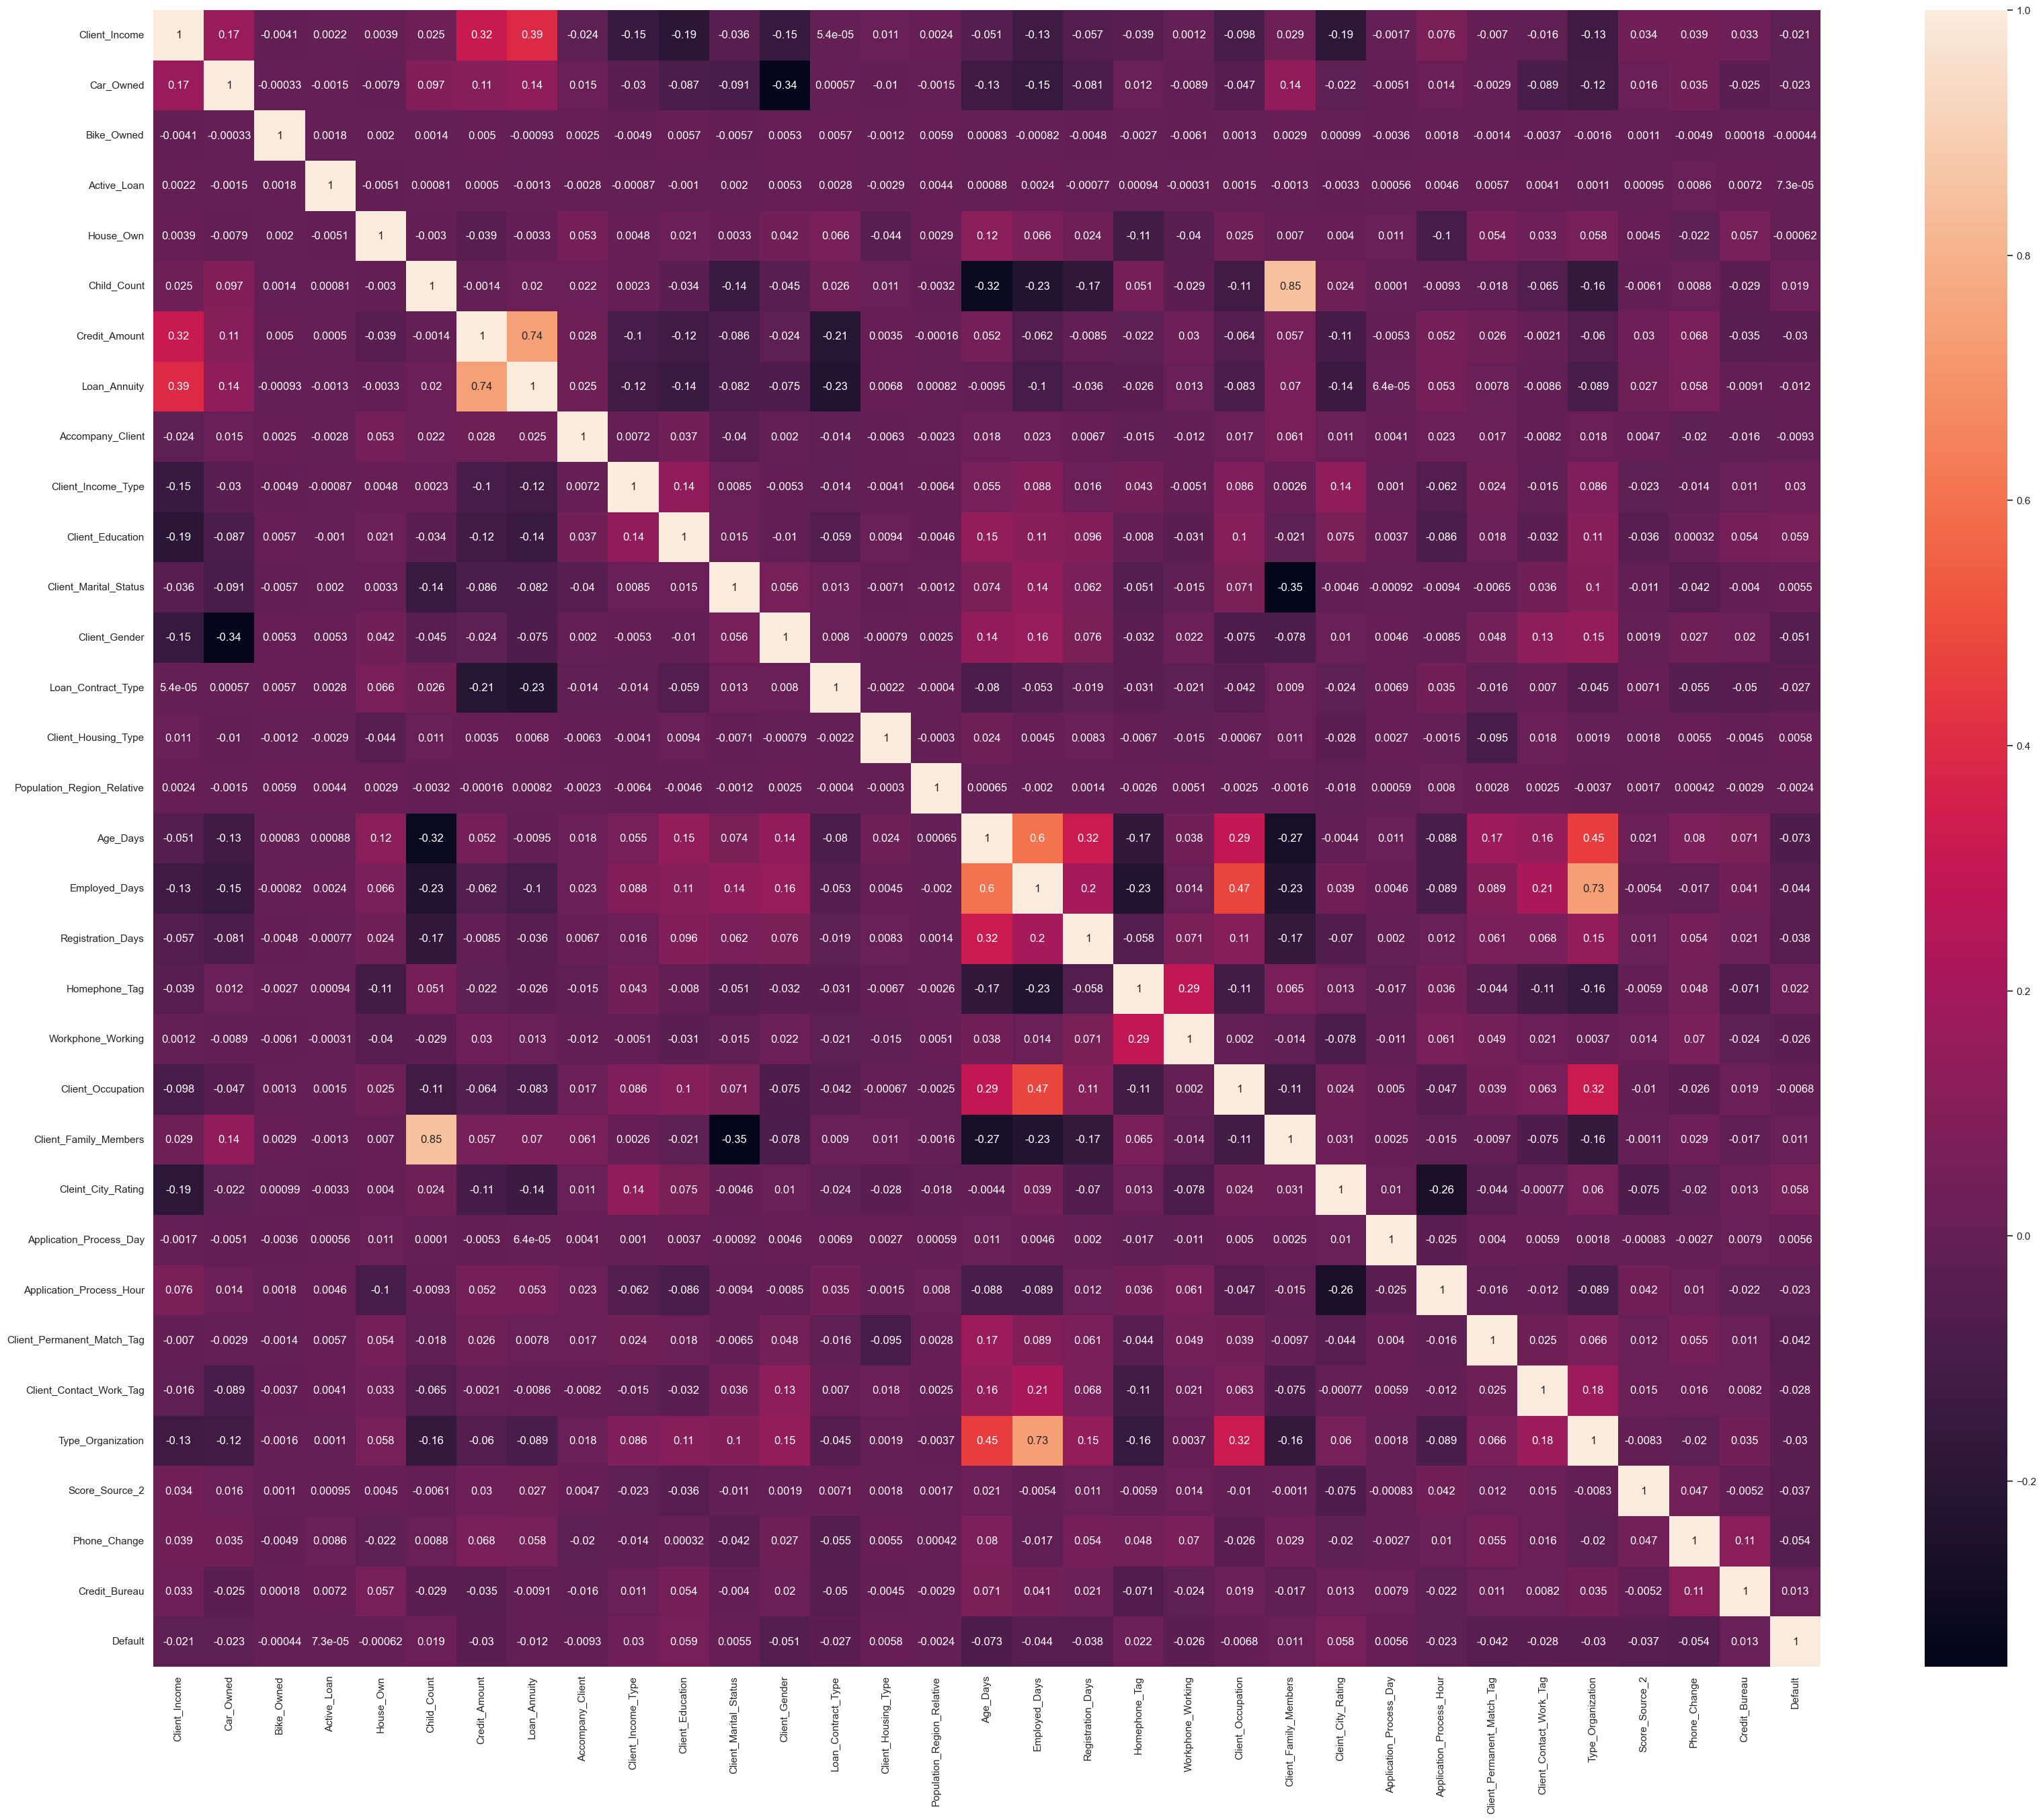

In [43]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [44]:
import pandas as pd

# Your correlation matrix (assuming it's stored in a DataFrame)
correlation_matrix = df.corr()

# Define the correlation threshold (e.g., 0.7 or -0.7)
threshold = 0.8

# Create a boolean mask for significant correlations
mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)  # Exclude self-correlation

# Identify columns to remove
columns_to_remove = [col for col in mask.columns if any(mask[col])]

#print the names
print(columns_to_remove)

['Child_Count', 'Client_Family_Members']


In [45]:
# Drop Child_Count column because it have high correlation with Client_Family_Members
df.drop(columns = 'Child_Count', inplace=True)

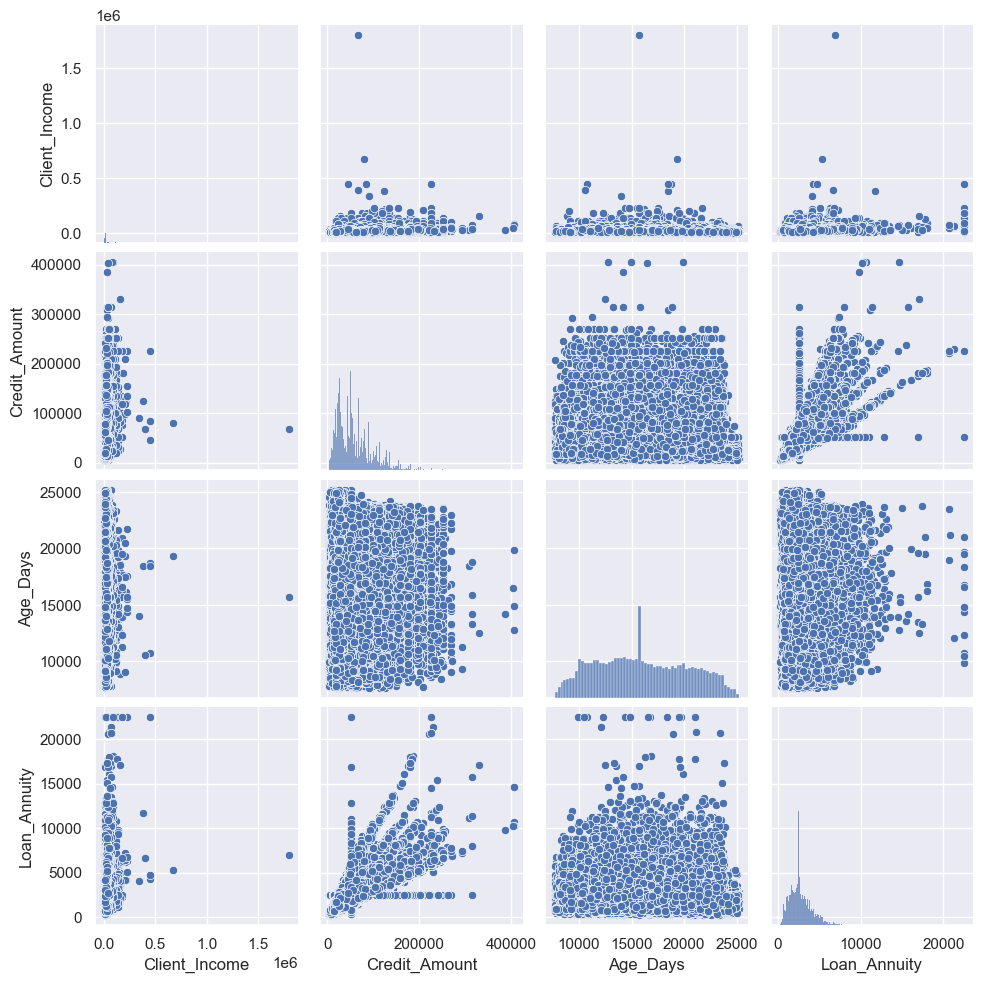

In [46]:
sns.pairplot(df[['Client_Income', 'Credit_Amount', 'Age_Days', 'Loan_Annuity']])
plt.show()

# Model fitting and prediction

In [47]:
import pandas as pd

X = df.drop('Default', axis=1)  # Features
y = df['Default']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a DataFrame with the target variable
df_target = pd.DataFrame(y, columns=['Default'])

# Count the number of samples in each class
class_counts = df_target['Default'].value_counts()

# Calculate the class imbalance ratio
imbalance_ratio = class_counts[1] / class_counts[0]

# Print the class counts and imbalance ratio
print("Class Counts:")
print(class_counts)
print("\nImbalance Ratio (1's to 0's):", imbalance_ratio)

Class Counts:
Default
0    112011
1      9845
Name: count, dtype: int64

Imbalance Ratio (1's to 0's): 0.08789315335101017


In [48]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
from imblearn.over_sampling import SMOTE
# Create the SMOTE object
smote = SMOTE(random_state=0)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [50]:
# Check the class distribution after resampling
class_counts_resampled = pd.Series(y_train_resampled).value_counts()
imbalance_ratio_resampled = class_counts_resampled[1] / class_counts_resampled[0]

print("Class Counts After SMOTE:")
print(class_counts_resampled)
print("\nImbalance Ratio After SMOTE:", imbalance_ratio_resampled)

Class Counts After SMOTE:
Default
0    89674
1    89674
Name: count, dtype: int64

Imbalance Ratio After SMOTE: 1.0


In [51]:
X_train_resampled = df.drop('Default', axis=1)
y_train_resampled = df['Default']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled,y_train_resampled, test_size=0.2,random_state=0)

In [52]:
# Calculate the Z-scores for each column in X
z_scores = np.abs(stats.zscore(X_train))

# Define a threshold for Z-scores (e.g., 3)
threshold = 3

# Create a boolean mask for outliers
outlier_mask = (z_scores < threshold).all(axis=1)

# Filter the training set to remove outliers
X_train_no_outliers = X_train[outlier_mask]
y_train_no_outliers = y_train[outlier_mask]

In [53]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=9, min_samples_leaf=2, min_samples_split=3, class_weight='balanced')
dtree.fit(X_train_no_outliers, y_train_no_outliers)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=2,
                       min_samples_split=3, random_state=0)

In [54]:
# Prediction
y_pred = dtree.predict(X_test)

ROC AUC Score: 0.65


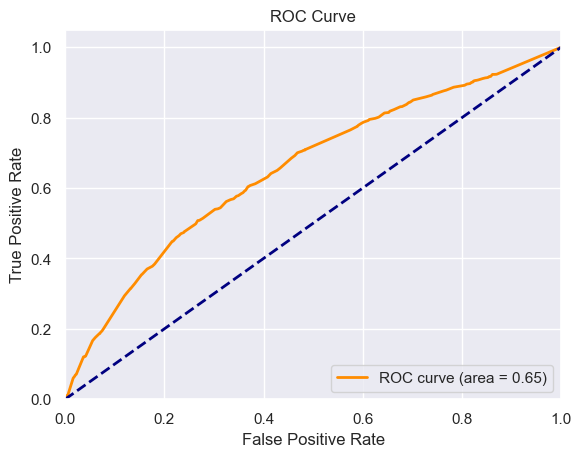

In [71]:
# ROC AUC Score
y_proba = dtree.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")
fpr1, tpr1, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr1, tpr1)

plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [56]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[14291  8046]
 [  836  1199]]


In [57]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 0.64
F1 Score: 0.21
Precision: 0.13
Recall: 0.59


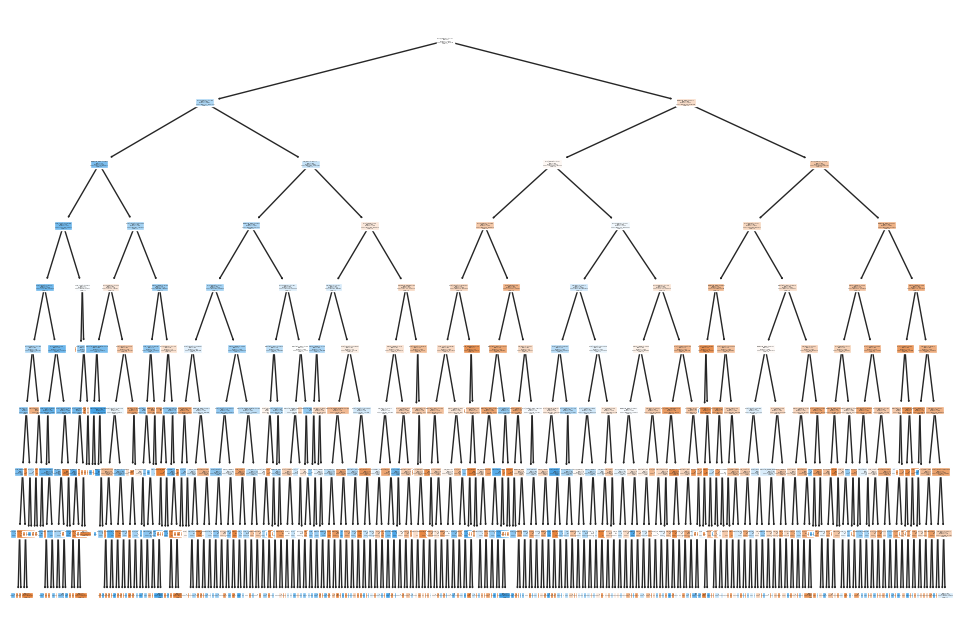

In [58]:
# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dtree, filled=True, feature_names=X_train_no_outliers.columns, class_names=["0", "1"])
plt.show()

In [59]:
xgb_classifier = XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,       # Maximum depth of each tree
    learning_rate=0.1, # Step size shrinkage
    subsample=0.8,     # Fraction of samples used for fitting trees
    colsample_bytree=0.8,  # Fraction of features used for fitting trees
    random_state=0
)

In [60]:
xgb_classifier.fit(X_train_no_outliers, y_train_no_outliers)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [61]:
y_pred = xgb_classifier.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9167897587395372


In [63]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[22332     5]
 [ 2023    12]]


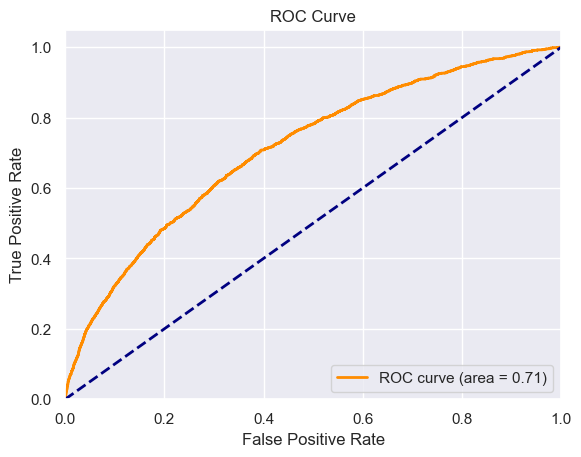

In [64]:
y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [65]:
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train_no_outliers, y_train_no_outliers)

RandomForestClassifier(random_state=0)

In [66]:
y_pred_rf = rf_classifier.predict(X_test)

In [67]:
confusion_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(confusion_rf)

Confusion Matrix (Random Forest):
[[22337     0]
 [ 1875   160]]


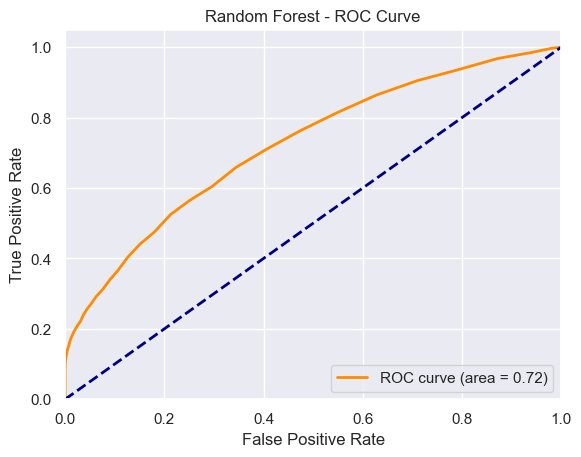

In [68]:
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [69]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy
print("Accuracy (Random Forest):", accuracy_rf)

Accuracy (Random Forest): 0.9230674544559331
